In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#chosen seven assets
adjclose = yf.download(['AAPL','AMZN','JPM','MS','MSFT','TSLA','TSTRX'], period = '1y')['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [27]:
returns = adjclose.pct_change()*100

In [28]:
#calculate the variance
(adjclose.pct_change()*100).var()

AAPL      4.801664
AMZN      9.210102
JPM       3.201174
MS        3.610182
MSFT      4.849970
TSLA     17.745013
TSTRX     2.162879
dtype: float64

In [29]:
#calculate the mean
returns.mean()

AAPL     0.004111
AMZN    -0.137584
JPM      0.013826
MS       0.035931
MSFT    -0.000233
TSLA    -0.132836
TSTRX   -0.026062
dtype: float64

In [30]:
#correlation matrix with all seven assets
returns.corr()

,AAPL,AMZN,JPM,MS,MSFT,TSLA,TSTRX
AAPL,1.000000,0.706800,0.534515,0.660537,0.794529,0.616826,0.878539
AMZN,0.706800,1.000000,0.485154,0.605595,0.757547,0.551941,0.804152
JPM,0.534515,0.485154,1.000000,0.770815,0.488751,0.384680,0.713586
MS,0.660537,0.605595,0.770815,1.000000,0.604288,0.525405,0.813057
MSFT,0.794529,0.757547,0.488751,0.604288,1.000000,0.496469,0.850903
TSLA,0.616826,0.551941,0.384680,0.525405,0.496469,1.000000,0.610893
TSTRX,0.878539,0.804152,0.713586,0.813057,0.850903,0.610893,1.000000


In [31]:
#yearly returns
annual_return = adjclose.resample('Y').last().pct_change().mean()
annual_return

AAPL     0.271083
AMZN     0.229643
JPM     -0.021085
MS       0.041028
MSFT     0.205163
TSLA     0.684202
TSTRX    0.069750
dtype: float64

In [32]:
#annual standard deviation
annual_sd = adjclose.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
annual_sd

AAPL     0.346303
AMZN     0.482102
JPM      0.282411
MS       0.300113
MSFT     0.348118
TSLA     0.670678
TSTRX    0.232694
dtype: float64

In [14]:
assets = pd.concat([annual_return, annual_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.271083,0.346304
AMZN,0.229643,0.482102
JPM,-0.021085,0.282411
MS,0.041028,0.300113
MSFT,0.205163,0.348118
TSLA,0.684202,0.670678
TSTRX,0.069750,0.232694


In [15]:
covariance_matrix = adjclose.pct_change().apply(lambda x: np.log(1+x)).cov()
covariance_matrix

,AAPL,AMZN,JPM,MS,MSFT,TSLA,TSTRX
AAPL,0.000480,0.000470,0.000209,0.000274,0.000383,0.000574,0.000283
AMZN,0.000470,0.000930,0.000264,0.000349,0.000508,0.000706,0.000360
JPM,0.000209,0.000264,0.000319,0.000261,0.000191,0.000289,0.000187
MS,0.000274,0.000349,0.000261,0.000360,0.000252,0.000420,0.000227
MSFT,0.000383,0.000508,0.000191,0.000252,0.000485,0.000460,0.000275
TSLA,0.000574,0.000706,0.000289,0.000420,0.000460,0.001799,0.000380
TSTRX,0.000283,0.000360,0.000187,0.000227,0.000275,0.000380,0.000217


In [33]:
p_ret = [] #portfolio returns
p_vol = [] #portfolio volatility
p_weights = [] #asset weights
num_assets = len(adjclose.columns)
num_portfolios = 600000

In [34]:
#for loop of assets in portfolio and their expected returns
#building the efficient frontier
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, annual_return) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = covariance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [35]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(adjclose.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [36]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,JPM weight,MS weight,MSFT weight,TSLA weight,TSTRX weight
0,0.266593,0.337144,0.023461,0.074208,0.080775,0.083449,0.307374,0.241461,0.189271
1,0.251425,0.329055,0.222953,0.119738,0.241188,0.031142,0.172115,0.190639,0.022225
2,0.289043,0.373611,0.094393,0.316740,0.137241,0.008191,0.051224,0.252924,0.139287
3,0.275073,0.337100,0.248838,0.040192,0.100351,0.120064,0.062845,0.248760,0.178950
4,0.117252,0.282561,0.073696,0.050186,0.112272,0.412486,0.340997,0.000831,0.009531


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

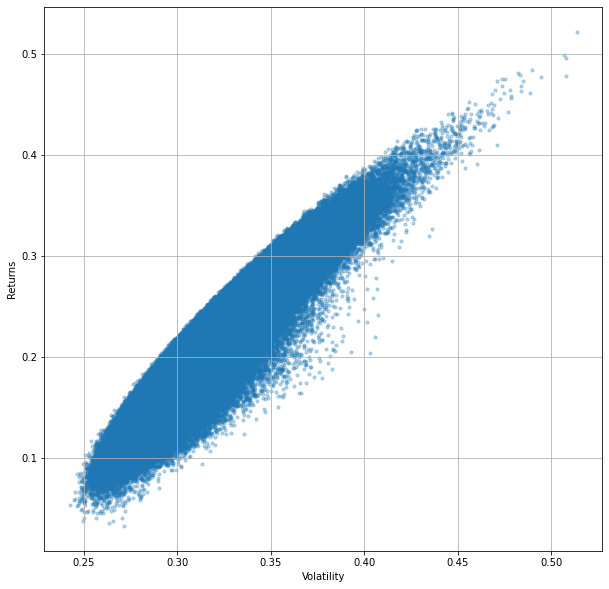

In [37]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [38]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.053821
Volatility      0.242412
AAPL weight     0.036368
AMZN weight     0.014485
JPM weight      0.366974
MS weight       0.072193
MSFT weight     0.033677
TSLA weight     0.008594
TSTRX weight    0.467708
Name: 482373, dtype: float64

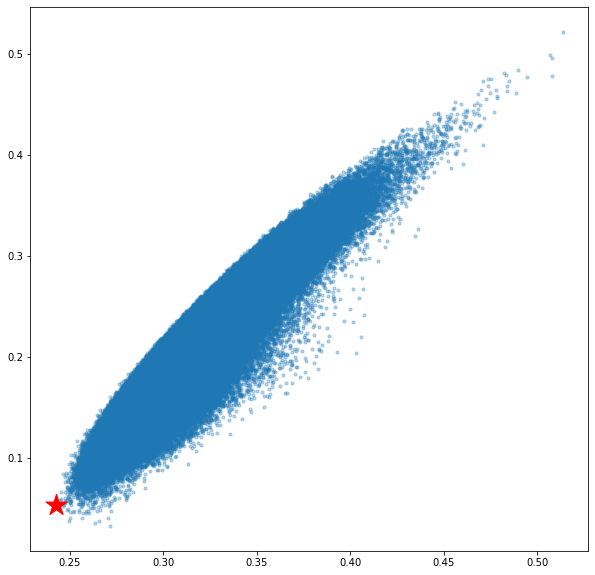

In [40]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [41]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.522201
Volatility      0.513557
AAPL weight     0.069249
AMZN weight     0.040654
JPM weight      0.003719
MS weight       0.002663
MSFT weight     0.221742
TSLA weight     0.654886
TSTRX weight    0.007086
Name: 205981, dtype: float64

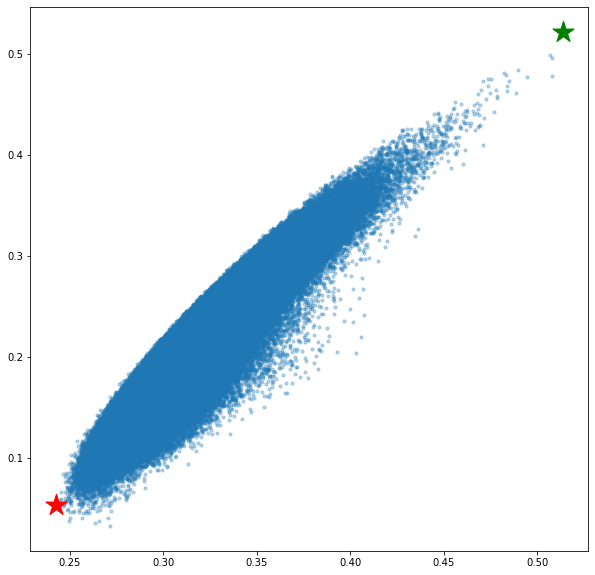

In [42]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)